# MNIST Digits
## Nicolas A. Gort Freitas
### CS156 Machine Learning

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import regex as re
import pyjoyplot as pjp
import pandas as pd

from sklearn.svm import SVC
from sklearn.datasets import fetch_mldata
from sklearn.metrics import f1_score, auc, precision_recall_curve, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV

### Data processing

In [10]:
mnist = fetch_mldata('MNIST original')
indices_37 = np.where((mnist.target == 3) | (mnist.target == 7))[0]

In [331]:
X = mnist.data[indices_37]
y = mnist.target[indices_37]
y = np.where(y == 7, 1, 0)

random_indices = np.random.choice(range(y.shape[0]), round(y.shape[0]/2),replace=False,)
y_counts = [round(100*x/len(y)) for x in np.bincount(y)]
y_reduced_counts = [round(100*x/len(y[random_indices])) for x in np.bincount(y[random_indices])]

print("Digit balance before random data reduction: {}% 3's and {}% 7's.".format(y_counts[0],y_counts[1]))
print("Digit balance after 50% random data reduction: {}% 3's and {}% 7's.".format(y_reduced_counts[0],y_reduced_counts[1]))

X = X[random_indices]
y = y[random_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y)

Digit balance before random data reduction: 49.0% 3's and 51.0% 7's.
Digit balance after 50% random data reduction: 50.0% 3's and 50.0% 7's.


### Plotting examples

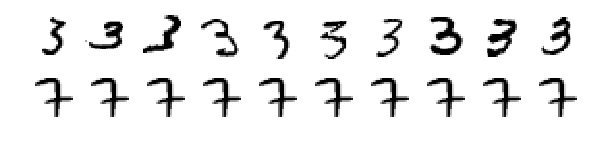

In [325]:
fig, axes = plt.subplots(2,10, figsize=(10,2))

for i in range(10):
    axes[0,i].imshow(X[np.where(y == 0)][4*i].reshape(28,28),cmap='binary')
    axes[0,i].axis('off')
    
for j in range(10):
    axes[1,j].imshow(X[np.where(y == 1)][3*i].reshape(28,28),cmap='binary')
    axes[1,j].axis('off')


plt.subplots_adjust(None,None,None,None,wspace=0.05,hspace=0.05)
plt.show()

# Linear kernel

### Training and Cross-validation

In [23]:
svm_lin = SVC(probability=True)

param_grid_lin = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel' : ['linear']
}

grid_lin = GridSearchCV(svm_lin, cv=3, n_jobs=3, param_grid = param_grid_lin, verbose = 5)
grid_lin.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001, kernel=linear ..........................................
[CV] C=0.001, kernel=linear ..........................................
[CV] C=0.001, kernel=linear ..........................................
[CV] ................. C=0.001, kernel=linear, score=0.983370 -   5.2s
[CV] C=0.01, kernel=linear ...........................................
[CV] ................. C=0.001, kernel=linear, score=0.982262 -   5.6s
[CV] C=0.01, kernel=linear ...........................................
[CV] ................. C=0.001, kernel=linear, score=0.986142 -   5.9s
[CV] C=0.01, kernel=linear ...........................................
[CV] .................. C=0.01, kernel=linear, score=0.983370 -   5.2s
[CV] C=0.1, kernel=linear ............................................
[CV] .................. C=0.01, kernel=linear, score=0.982262 -   5.7s
[CV] C=0.1, kernel=linear ............................................
[CV] ............

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   26.5s


[CV] .................... C=10, kernel=linear, score=0.983370 -   5.7s
[CV] C=100, kernel=linear ............................................
[CV] .................... C=10, kernel=linear, score=0.982262 -   5.9s
[CV] C=100, kernel=linear ............................................
[CV] .................... C=10, kernel=linear, score=0.986142 -   6.3s
[CV] C=100, kernel=linear ............................................
[CV] ................... C=100, kernel=linear, score=0.983370 -   5.6s
[CV] C=1000, kernel=linear ...........................................
[CV] ................... C=100, kernel=linear, score=0.982262 -   5.9s
[CV] C=1000, kernel=linear ...........................................
[CV] ................... C=100, kernel=linear, score=0.986142 -   6.2s
[CV] C=1000, kernel=linear ...........................................
[CV] .................. C=1000, kernel=linear, score=0.983370 -   5.6s
[CV] .................. C=1000, kernel=linear, score=0.982262 -   6.2s
[CV] .

[Parallel(n_jobs=3)]: Done  21 out of  21 | elapsed:   46.0s finished
[Parallel(n_jobs=3)]: Done  21 out of  21 | elapsed:   46.0s remaining:    0.0s


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=5)

### Results

In [108]:
print('Best C value:\t\t ',grid_lin.best_params_['C'])
print('Total training time:      46 seconds')
print('Best score:\t         ', round(grid_lin.best_score_,5))

Best C value:		  0.001
Total training time:      46 seconds
Best score:	          0.98392


In [31]:
y_lin_probs_train = grid_lin.predict_proba(X_train)[:,1]
fpr_lin_train, tpr_lin_train, thresholds_lin_train = roc_curve(y_train, y_lin_probs_train)
precision_lin_train, recall_lin_train, _lin_tr = precision_recall_curve(y_train, y_lin_probs_train)
f1_lin_train = f1_score(y_train,grid_lin.predict(X_train))

y_lin_probs_test = grid_lin.predict_proba(X_test)[:,1]
fpr_lin_test, tpr_lin_test, thresholds_lin_test = roc_curve(y_test, y_lin_probs_test)
precision_lin_test, recall_lin_test, _lin_tr = precision_recall_curve(y_test, y_lin_probs_test)
f1_lin_test = f1_score(y_test,grid_lin.predict(X_test))

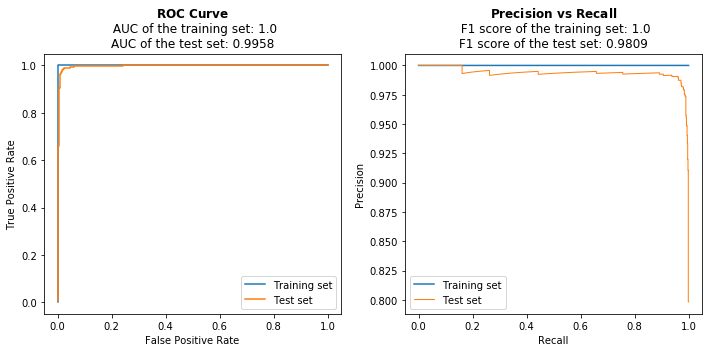

In [334]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(fpr_lin_train,tpr_lin_train,label='Training set')
axes[0].plot(fpr_lin_test,tpr_lin_test,label='Test set')


axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title( r'$\bf{ROC\ Curve}$' + '\n AUC of the training set: {}\nAUC of the test set: {}'.format(round(auc(fpr_lin_train,tpr_lin_train),4),round(auc(fpr_lin_test,tpr_lin_test),4)))
axes[0].legend()

axes[1].plot(recall_lin_train,precision_lin_train,label='Training set')
axes[1].plot(recall_lin_test,precision_lin_test,label='Test set',linewidth=1)

axes[1].set_ylabel('Precision')
axes[1].set_xlabel('Recall')
axes[1].set_title( r'$\bf{Precision\ vs\ Recall}$' + '\n F1 score of the training set: {}\nF1 score of the test set: {}'.format(round(f1_lin_train,4),round(f1_lin_test,4)))
axes[1].legend()

plt.subplots_adjust(wspace=0.5,hspace=.25)
plt.tight_layout()

plt.show()

# Poly kernel

### Training and Cross-validation

In [33]:
svm_poly = SVC(probability=True)

param_grid_poly = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'degree' : [2,3,4],
    'gamma' : [1/X_train.shape[1], 10/X_train.shape[1]],
    'kernel' : ['poly']
}

grid_poly = GridSearchCV(svm_poly, cv=3, n_jobs=3, param_grid = param_grid_poly, verbose = 5)
grid_poly.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly .....
[CV] C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly .....
[CV] C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.995011 -   6.7s
[CV] C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.991685 -   6.8s
[CV] C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.993348 -   7.1s
[CV] C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.991685 -   7.2s
[CV] C=0.001, degree=3, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.9950

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   30.0s


[CV]  C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   9.9s
[CV] C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -  10.6s
[CV] C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -  10.6s
[CV] C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   9.3s
[CV] C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -  10.1s
[CV] C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   9.8s
[CV] C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.01, degree=2, gamma=0

[CV] C=1, degree=4, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   8.7s
[CV] C=1, degree=4, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   8.4s
[CV] C=1, degree=4, gamma=0.0012755102040816326, kernel=poly .........


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  3.1min


[CV]  C=1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   8.2s
[CV] C=1, degree=4, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   8.9s
[CV] C=1, degree=4, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -   8.3s
[CV] C=1, degree=4, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   7.8s
[CV] C=10, degree=2, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   8.4s
[CV] C=10, degree=2, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   8.6s
[CV] C=10, degree=2, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=10, degree=2, gamma=0.0012755102040816326, kern

[CV] C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.4s
[CV] C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.5s
[CV] C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   7.4s
[CV] C=1000, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   7.9s
[CV] C=1000, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -   8.3s
[CV] C=1000, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   7.9s
[CV]  C=1000, degree=4, gamma=0.01275

[Parallel(n_jobs=3)]: Done 126 out of 126 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4], 'gamma': [0.0012755102040816326, 0.012755102040816327], 'kernel': ['poly']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=5)

### Results

In [109]:
print('Best C value:\t\t ',grid_poly.best_params_['C'])
print('Best degree: \t\t ',grid_poly.best_params_['degree'])
print('Best gamma: \t\t ',grid_poly.best_params_['gamma'])
print('Total training time:      5.7 minutes')
print('Best score:\t         ', round(grid_poly.best_score_,5))

Best C value:		  0.001
Best degree: 		  2
Best gamma: 		  0.0012755102040816326
Total training time:      5.7 minutes
Best score:	          0.99335


In [34]:
y_poly_probs_train = grid_poly.predict_proba(X_train)[:,1]
fpr_poly_train, tpr_poly_train, thresholds_poly_train = roc_curve(y_train, y_poly_probs_train)
precision_poly_train, recall_poly_train, _poly_tr = precision_recall_curve(y_train, y_poly_probs_train)
f1_poly_train = f1_score(y_train,grid_poly.predict(X_train))

y_poly_probs_test = grid_poly.predict_proba(X_test)[:,1]
fpr_poly_test, tpr_poly_test, thresholds_poly_test = roc_curve(y_test, y_poly_probs_test)
precision_poly_test, recall_poly_test, _poly_tr = precision_recall_curve(y_test, y_poly_probs_test)
f1_poly_test = f1_score(y_test,grid_poly.predict(X_test))

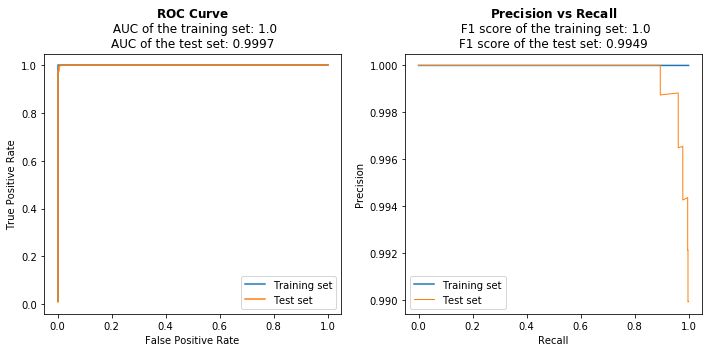

In [332]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(fpr_poly_train,tpr_poly_train,label='Training set')
axes[0].plot(fpr_poly_test,tpr_poly_test,label='Test set')


axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title( r'$\bf{ROC\ Curve}$' + '\n AUC of the training set: {}\nAUC of the test set: {}'.format(round(auc(fpr_poly_train,tpr_poly_train),4),round(auc(fpr_poly_test,tpr_poly_test),4)))
axes[0].legend()

axes[1].plot(recall_poly_train,precision_poly_train,label='Training set')
axes[1].plot(recall_poly_test,precision_poly_test,label='Test set',linewidth=1)

axes[1].set_ylabel('Precision')
axes[1].set_xlabel('Recall')
axes[1].set_title( r'$\bf{Precision\ vs\ Recall}$' + '\n F1 score of the training set: {}\nF1 score of the test set: {}'.format(round(f1_poly_train,4),round(f1_poly_test,4)))
axes[1].legend()

plt.subplots_adjust(wspace=0.5,hspace=.25)
plt.tight_layout()

plt.show()

# Radial Basis Function kernel

### Training and Cross-validation

In [15]:
svm_rbf = SVC(probability=True)

param_grid_rbf = {
    'C': [1, 10, 100, 1000], 
    'gamma' : np.logspace(-8,-5,3),
    #'gamma': [1/X_train.shape[1], 10/X_train.shape[1]], 
    'kernel': ['rbf']
}

#to do: try 'gamma' : np.outer([1,5],np.logspace(-3, 0, 4)).flatten()

grid_rbf = GridSearchCV(svm_rbf, cv=3, n_jobs=3, param_grid = param_grid_rbf, verbose=10)
grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ........... C=1, gamma=1e-08, kernel=rbf, score=0.982262 -  19.9s
[CV] C=1, gamma=3.162277660168379e-07, kernel=rbf ....................
[CV] ........... C=1, gamma=1e-08, kernel=rbf, score=0.983925 -  20.0s
[CV] C=1, gamma=3.162277660168379e-07, kernel=rbf ....................
[CV] ........... C=1, gamma=1e-08, kernel=rbf, score=0.986142 -  20.1s
[CV] C=1, gamma=3.162277660168379e-07, kernel=rbf ....................


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   20.1s


[CV]  C=1, gamma=3.162277660168379e-07, kernel=rbf, score=0.992239 -  13.5s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV]  C=1, gamma=3.162277660168379e-07, kernel=rbf, score=0.994457 -  13.5s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV]  C=1, gamma=3.162277660168379e-07, kernel=rbf, score=0.993348 -  13.7s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ........... C=1, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] ........... C=1, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=10, gamma=1e-08, kernel=rbf ...................................


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.1min


[CV] ........... C=1, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .......... C=10, gamma=1e-08, kernel=rbf, score=0.986696 -   7.9s
[CV] C=10, gamma=3.162277660168379e-07, kernel=rbf ...................
[CV] .......... C=10, gamma=1e-08, kernel=rbf, score=0.985033 -   8.1s
[CV] C=10, gamma=3.162277660168379e-07, kernel=rbf ...................
[CV] .......... C=10, gamma=1e-08, kernel=rbf, score=0.989468 -   8.1s
[CV] C=10, gamma=3.162277660168379e-07, kernel=rbf ...................


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.2min


[CV]  C=10, gamma=3.162277660168379e-07, kernel=rbf, score=0.993348 -  12.1s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV]  C=10, gamma=3.162277660168379e-07, kernel=rbf, score=0.993902 -  12.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV]  C=10, gamma=3.162277660168379e-07, kernel=rbf, score=0.996120 -  12.4s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .......... C=10, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] .......... C=10, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] .......... C=10, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ......... C=100, gamma=1e-08, kernel=rbf, score=0.987251 -   6.1s
[CV] C=100, gamma=3.162277660168379e-07, kernel=rbf .......

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  4.0min


[CV] ......... C=100, gamma=1e-08, kernel=rbf, score=0.989468 -   6.4s
[CV] C=100, gamma=3.162277660168379e-07, kernel=rbf ..................
[CV]  C=100, gamma=3.162277660168379e-07, kernel=rbf, score=0.993902 -  13.0s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV]  C=100, gamma=3.162277660168379e-07, kernel=rbf, score=0.993348 -  13.1s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV]  C=100, gamma=3.162277660168379e-07, kernel=rbf, score=0.996120 -  13.9s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] ......... C=100, gamma=1e-05, kernel=rbf, score=0.506098 - 1.6min
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] ......... C=100, gamma=1e-05, kernel=rbf, score=0.506098 - 1.6min
[CV] C=1000, gamma=1e-08, kernel=rbf .................................


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  5.8min


[CV] ......... C=100, gamma=1e-05, kernel=rbf, score=0.506098 - 1.6min
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] ........ C=1000, gamma=1e-08, kernel=rbf, score=0.984479 -   6.3s
[CV] C=1000, gamma=3.162277660168379e-07, kernel=rbf .................
[CV] ........ C=1000, gamma=1e-08, kernel=rbf, score=0.984479 -   6.4s
[CV] C=1000, gamma=3.162277660168379e-07, kernel=rbf .................
[CV] ........ C=1000, gamma=1e-08, kernel=rbf, score=0.990022 -   6.3s
[CV] C=1000, gamma=3.162277660168379e-07, kernel=rbf .................
[CV]  C=1000, gamma=3.162277660168379e-07, kernel=rbf, score=0.993902 -  11.7s
[CV]  C=1000, gamma=3.162277660168379e-07, kernel=rbf, score=0.993348 -  11.9s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV]  C=1000, gamma=3.162277660168379e-07, kernel=rbf, score=0.996120 -  12.5s
[CV] C=1000, gamma=1e-05, kernel=rbf ................

[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': array([1.00000e-08, 3.16228e-07, 1.00000e-05]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

### Results

In [112]:
print('Best C value:\t\t ',grid_rbf.best_params_['C'])
print('Best gamma: \t\t ',grid_rbf.best_params_['gamma'])
print('Total training time:      7.6 minutes')
print('Best score:\t         ', round(grid_rbf.best_score_,5))

Best C value:		  10
Best gamma: 		  3.162277660168379e-07
Total training time:      7.6 minutes
Best score:	          0.99446


In [18]:
y_rbf_probs_train = grid_rbf.predict_proba(X_train)[:,1]
fpr_rbf_train, tpr_rbf_train, thresholds_rbf_train = roc_curve(y_train, y_rbf_probs_train)
precision_rbf_train, recall_rbf_train, _rbf_tr = precision_recall_curve(y_train, y_rbf_probs_train)
f1_rbf_train = f1_score(y_train,grid_rbf.predict(X_train))

y_rbf_probs_test = grid_rbf.predict_proba(X_test)[:,1]
fpr_rbf_test, tpr_rbf_test, thresholds_rbf_test = roc_curve(y_test, y_rbf_probs_test)
precision_rbf_test, recall_rbf_test, _rbf_tr = precision_recall_curve(y_test, y_rbf_probs_test)
f1_rbf_test = f1_score(y_test,grid_rbf.predict(X_test))

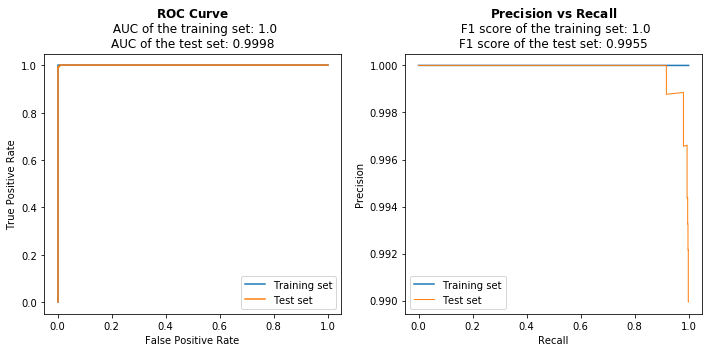

In [333]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(fpr_rbf_train,tpr_rbf_train,label='Training set')
axes[0].plot(fpr_rbf_test,tpr_rbf_test,label='Test set')


axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title( r'$\bf{ROC\ Curve}$' + '\n AUC of the training set: {}\nAUC of the test set: {}'.format(round(auc(fpr_rbf_train,tpr_rbf_train),4),round(auc(fpr_rbf_test,tpr_rbf_test),4)))
axes[0].legend()

axes[1].plot(recall_rbf_train,precision_rbf_train,label='Training set')
axes[1].plot(recall_rbf_test,precision_rbf_test,label='Test set',linewidth=1)

axes[1].set_ylabel('Precision')
axes[1].set_xlabel('Recall')
axes[1].set_title( r'$\bf{Precision\ vs\ Recall}$' + '\n F1 score of the training set: {}\nF1 score of the test set: {}'.format(round(f1_rbf_train,4),round(f1_rbf_test,4)))
axes[1].legend()

plt.subplots_adjust(wspace=0.5,hspace=.25)
plt.tight_layout()

plt.show()

# Kernel comparison analysis

### Verbose parsing

In [40]:
verb_lin = """
[CV] C=0.001, kernel=linear ..........................................
[CV] C=0.001, kernel=linear ..........................................
[CV] C=0.001, kernel=linear ..........................................
[CV] ................. C=0.001, kernel=linear, score=0.983370 -   5.2s
[CV] C=0.01, kernel=linear ...........................................
[CV] ................. C=0.001, kernel=linear, score=0.982262 -   5.6s
[CV] C=0.01, kernel=linear ...........................................
[CV] ................. C=0.001, kernel=linear, score=0.986142 -   5.9s
[CV] C=0.01, kernel=linear ...........................................
[CV] .................. C=0.01, kernel=linear, score=0.983370 -   5.2s
[CV] C=0.1, kernel=linear ............................................
[CV] .................. C=0.01, kernel=linear, score=0.982262 -   5.7s
[CV] C=0.1, kernel=linear ............................................
[CV] .................. C=0.01, kernel=linear, score=0.986142 -   6.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ................... C=0.1, kernel=linear, score=0.983370 -   6.8s
[CV] C=1, kernel=linear ..............................................
[CV] ................... C=0.1, kernel=linear, score=0.982262 -   7.3s
[CV] C=1, kernel=linear ..............................................
[CV] ................... C=0.1, kernel=linear, score=0.986142 -   7.6s
[CV] C=1, kernel=linear ..............................................
[CV] ..................... C=1, kernel=linear, score=0.983370 -   6.0s
[CV] C=10, kernel=linear .............................................
[CV] ..................... C=1, kernel=linear, score=0.982262 -   6.2s
[CV] C=10, kernel=linear .............................................
[CV] ..................... C=1, kernel=linear, score=0.986142 -   6.7s
[CV] C=10, kernel=linear .............................................
[CV] .................... C=10, kernel=linear, score=0.983370 -   5.7s
[CV] C=100, kernel=linear ............................................
[CV] .................... C=10, kernel=linear, score=0.982262 -   5.9s
[CV] C=100, kernel=linear ............................................
[CV] .................... C=10, kernel=linear, score=0.986142 -   6.3s
[CV] C=100, kernel=linear ............................................
[CV] ................... C=100, kernel=linear, score=0.983370 -   5.6s
[CV] C=1000, kernel=linear ...........................................
[CV] ................... C=100, kernel=linear, score=0.982262 -   5.9s
[CV] C=1000, kernel=linear ...........................................
[CV] ................... C=100, kernel=linear, score=0.986142 -   6.2s
[CV] C=1000, kernel=linear ...........................................
[CV] .................. C=1000, kernel=linear, score=0.983370 -   5.6s
[CV] .................. C=1000, kernel=linear, score=0.982262 -   6.2s
[CV] .................. C=1000, kernel=linear, score=0.986142 -   6.8s
"""

jobs_lin = [float(x[:-1]) for x in (re.findall('..[0-9]s',verb_lin))]

In [41]:
verb_poly = """
[CV] C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly .....
[CV] C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly .....
[CV] C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.995011 -   6.7s
[CV] C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.991685 -   6.8s
[CV] C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.993348 -   7.1s
[CV] C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.991685 -   7.2s
[CV] C=0.001, degree=3, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.995011 -   7.2s
[CV] C=0.001, degree=3, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.993348 -   7.5s
[CV] C=0.001, degree=3, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.993902 -   7.0s
[CV] C=0.001, degree=3, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   7.5s
[CV] C=0.001, degree=3, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   7.4s
[CV] C=0.001, degree=3, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.993902 -   7.1s
[CV] C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.6s
[CV] C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.7s
[CV] C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly .....
[CV]  C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   9.9s
[CV] C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -  10.6s
[CV] C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -  10.6s
[CV] C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   9.3s
[CV] C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -  10.1s
[CV] C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.001, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   9.8s
[CV] C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.991685 -   7.8s
[CV] C=0.01, degree=2, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.995011 -   7.8s
[CV] C=0.01, degree=2, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.993348 -   7.9s
[CV] C=0.01, degree=2, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.991685 -   7.9s
[CV] C=0.01, degree=3, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.01, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.995011 -   8.0s
[CV] C=0.01, degree=3, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.01, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.993348 -   8.9s
[CV] C=0.01, degree=3, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.01, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.993902 -   8.6s
[CV] C=0.01, degree=3, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   9.1s
[CV] C=0.01, degree=3, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   8.8s
[CV] C=0.01, degree=3, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.993902 -   7.6s
[CV] C=0.01, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.01, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   8.2s
[CV] C=0.01, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.01, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.8s
[CV] C=0.01, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=0.01, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   7.7s
[CV] C=0.01, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   8.5s
[CV] C=0.01, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -   8.8s
[CV] C=0.01, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=0.01, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   9.0s
[CV] C=0.1, degree=2, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.01, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   9.6s
[CV] C=0.1, degree=2, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.01, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   9.3s
[CV] C=0.1, degree=2, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.1, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.991685 -   7.8s
[CV] C=0.1, degree=2, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.995011 -   7.8s
[CV] C=0.1, degree=2, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.993348 -   7.9s
[CV] C=0.1, degree=2, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.991685 -   7.3s
[CV] C=0.1, degree=3, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.1, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.995011 -   7.3s
[CV] C=0.1, degree=3, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.1, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.993348 -   7.5s
[CV] C=0.1, degree=3, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.1, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.993902 -   7.3s
[CV] C=0.1, degree=3, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   7.8s
[CV] C=0.1, degree=3, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   9.0s
[CV] C=0.1, degree=3, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.993902 -   8.6s
[CV] C=0.1, degree=4, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.1, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   9.3s
[CV] C=0.1, degree=4, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.1, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   8.3s
[CV] C=0.1, degree=4, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=0.1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   8.1s
[CV] C=0.1, degree=4, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   8.7s
[CV] C=0.1, degree=4, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -   8.6s
[CV] C=0.1, degree=4, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=0.1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   7.9s
[CV] C=1, degree=2, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=0.1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   8.5s
[CV] C=1, degree=2, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=0.1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   9.2s
[CV] C=1, degree=2, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.991685 -   8.1s
[CV] C=1, degree=2, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.995011 -   8.1s
[CV] C=1, degree=2, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.993348 -   7.7s
[CV] C=1, degree=2, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.991685 -   7.4s
[CV] C=1, degree=3, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.995011 -   7.4s
[CV] C=1, degree=3, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.993348 -   8.0s
[CV] C=1, degree=3, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.993902 -   7.6s
[CV] C=1, degree=3, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   8.2s
[CV] C=1, degree=3, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   8.3s
[CV] C=1, degree=3, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.993902 -   8.0s
[CV] C=1, degree=4, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   8.7s
[CV] C=1, degree=4, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   8.4s
[CV] C=1, degree=4, gamma=0.0012755102040816326, kernel=poly .........
[CV]  C=1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   8.2s
[CV] C=1, degree=4, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   8.9s
[CV] C=1, degree=4, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -   8.3s
[CV] C=1, degree=4, gamma=0.012755102040816327, kernel=poly ..........
[CV]  C=1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   7.8s
[CV] C=10, degree=2, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   8.4s
[CV] C=10, degree=2, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=1, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   8.6s
[CV] C=10, degree=2, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=10, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.991685 -   7.5s
[CV] C=10, degree=2, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.995011 -   7.6s
[CV] C=10, degree=2, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.993348 -   8.6s
[CV] C=10, degree=2, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.991685 -   8.3s
[CV] C=10, degree=3, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=10, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.995011 -   8.5s
[CV] C=10, degree=3, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=10, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.993348 -   8.7s
[CV] C=10, degree=3, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=10, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   9.2s
[CV] C=10, degree=3, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.993902 -   8.6s
[CV] C=10, degree=3, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   7.8s
[CV] C=10, degree=3, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.993902 -   7.4s
[CV] C=10, degree=4, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=10, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.9s
[CV] C=10, degree=4, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=10, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   8.1s
[CV] C=10, degree=4, gamma=0.0012755102040816326, kernel=poly ........
[CV]  C=10, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   7.8s
[CV] C=10, degree=4, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   8.6s
[CV] C=10, degree=4, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -   8.2s
[CV] C=10, degree=4, gamma=0.012755102040816327, kernel=poly .........
[CV]  C=10, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   7.5s
[CV] C=100, degree=2, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=10, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   8.2s
[CV] C=100, degree=2, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=100, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.991685 -   6.5s
[CV] C=100, degree=2, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=100, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.995011 -   6.7s
[CV] C=100, degree=2, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=10, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   7.9s
[CV] C=100, degree=2, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=100, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.993348 -   7.0s
[CV] C=100, degree=2, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=100, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.991685 -   6.7s
[CV] C=100, degree=3, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=100, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.995011 -   6.7s
[CV] C=100, degree=3, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=100, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.993348 -   6.7s
[CV] C=100, degree=3, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=100, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.993902 -   6.8s
[CV] C=100, degree=3, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=100, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   7.2s
[CV] C=100, degree=3, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=100, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   7.5s
[CV] C=100, degree=3, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=100, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.993902 -   7.1s
[CV] C=100, degree=4, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=100, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.5s
[CV] C=100, degree=4, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=100, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.2s
[CV] C=100, degree=4, gamma=0.0012755102040816326, kernel=poly .......
[CV]  C=100, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   7.3s
[CV] C=100, degree=4, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=100, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   7.8s
[CV] C=100, degree=4, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=100, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -   8.2s
[CV] C=100, degree=4, gamma=0.012755102040816327, kernel=poly ........
[CV]  C=100, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   7.7s
[CV] C=1000, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=100, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   8.3s
[CV] C=1000, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.991685 -   6.5s
[CV] C=1000, degree=2, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.995011 -   6.5s
[CV] C=1000, degree=2, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=100, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   7.8s
[CV] C=1000, degree=2, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=2, gamma=0.0012755102040816326, kernel=poly, score=0.993348 -   7.1s
[CV] C=1000, degree=2, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.991685 -   6.9s
[CV] C=1000, degree=3, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.995011 -   7.2s
[CV] C=1000, degree=3, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=2, gamma=0.012755102040816327, kernel=poly, score=0.993348 -   7.6s
[CV] C=1000, degree=3, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   8.0s
[CV] C=1000, degree=3, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.993902 -   7.5s
[CV] C=1000, degree=3, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=3, gamma=0.0012755102040816326, kernel=poly, score=0.992794 -   7.3s
[CV] C=1000, degree=3, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.993902 -   7.0s
[CV] C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.4s
[CV] C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=3, gamma=0.012755102040816327, kernel=poly, score=0.992794 -   7.5s
[CV] C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly ......
[CV]  C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   7.4s
[CV] C=1000, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.992239 -   7.9s
[CV] C=1000, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=4, gamma=0.0012755102040816326, kernel=poly, score=0.991131 -   8.3s
[CV] C=1000, degree=4, gamma=0.012755102040816327, kernel=poly .......
[CV]  C=1000, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   7.9s
[CV]  C=1000, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.992239 -   8.4s
[CV]  C=1000, degree=4, gamma=0.012755102040816327, kernel=poly, score=0.991131 -   8.0s
"""
jobs_poly = [float(x[:-1]) for x in (re.findall('..[0-9]s',verb_poly))]

In [184]:
verb_rbf = """
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] C=1, gamma=1e-08, kernel=rbf ....................................
[CV] ........... C=1, gamma=1e-08, kernel=rbf, score=0.982262 -  19.9s
[CV] C=1, gamma=3.162277660168379e-07, kernel=rbf ....................
[CV] ........... C=1, gamma=1e-08, kernel=rbf, score=0.983925 -  20.0s
[CV] C=1, gamma=3.162277660168379e-07, kernel=rbf ....................
[CV] ........... C=1, gamma=1e-08, kernel=rbf, score=0.986142 -  20.1s
[CV] C=1, gamma=3.162277660168379e-07, kernel=rbf ....................
[CV]  C=1, gamma=3.162277660168379e-07, kernel=rbf, score=0.992239 -  13.5s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV]  C=1, gamma=3.162277660168379e-07, kernel=rbf, score=0.994457 -  13.5s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV]  C=1, gamma=3.162277660168379e-07, kernel=rbf, score=0.993348 -  13.7s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ........... C=1, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] ........... C=1, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] ........... C=1, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=10, gamma=1e-08, kernel=rbf ...................................
[CV] .......... C=10, gamma=1e-08, kernel=rbf, score=0.986696 -   7.9s
[CV] C=10, gamma=3.162277660168379e-07, kernel=rbf ...................
[CV] .......... C=10, gamma=1e-08, kernel=rbf, score=0.985033 -   8.1s
[CV] C=10, gamma=3.162277660168379e-07, kernel=rbf ...................
[CV] .......... C=10, gamma=1e-08, kernel=rbf, score=0.989468 -   8.1s
[CV] C=10, gamma=3.162277660168379e-07, kernel=rbf ...................
[CV]  C=10, gamma=3.162277660168379e-07, kernel=rbf, score=0.993348 -  12.1s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV]  C=10, gamma=3.162277660168379e-07, kernel=rbf, score=0.993902 -  12.0s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV]  C=10, gamma=3.162277660168379e-07, kernel=rbf, score=0.996120 -  12.4s
[CV] C=10, gamma=1e-05, kernel=rbf ...................................
[CV] .......... C=10, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] .......... C=10, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] .......... C=10, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] C=100, gamma=1e-08, kernel=rbf ..................................
[CV] ......... C=100, gamma=1e-08, kernel=rbf, score=0.987251 -   6.1s
[CV] C=100, gamma=3.162277660168379e-07, kernel=rbf ..................
[CV] ......... C=100, gamma=1e-08, kernel=rbf, score=0.987251 -   6.0s
[CV] C=100, gamma=3.162277660168379e-07, kernel=rbf ..................
[CV] ......... C=100, gamma=1e-08, kernel=rbf, score=0.989468 -   6.4s
[CV] C=100, gamma=3.162277660168379e-07, kernel=rbf ..................
[CV]  C=100, gamma=3.162277660168379e-07, kernel=rbf, score=0.993902 -  13.0s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV]  C=100, gamma=3.162277660168379e-07, kernel=rbf, score=0.993348 -  13.1s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV]  C=100, gamma=3.162277660168379e-07, kernel=rbf, score=0.996120 -  13.9s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] ......... C=100, gamma=1e-05, kernel=rbf, score=0.506098 - 1.6min
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] ......... C=100, gamma=1e-05, kernel=rbf, score=0.506098 - 1.6min
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] ......... C=100, gamma=1e-05, kernel=rbf, score=0.506098 - 1.6min
[CV] C=1000, gamma=1e-08, kernel=rbf .................................
[CV] ........ C=1000, gamma=1e-08, kernel=rbf, score=0.984479 -   6.3s
[CV] C=1000, gamma=3.162277660168379e-07, kernel=rbf .................
[CV] ........ C=1000, gamma=1e-08, kernel=rbf, score=0.984479 -   6.4s
[CV] C=1000, gamma=3.162277660168379e-07, kernel=rbf .................
[CV] ........ C=1000, gamma=1e-08, kernel=rbf, score=0.990022 -   6.3s
[CV] C=1000, gamma=3.162277660168379e-07, kernel=rbf .................
[CV]  C=1000, gamma=3.162277660168379e-07, kernel=rbf, score=0.993902 -  11.7s
[CV]  C=1000, gamma=3.162277660168379e-07, kernel=rbf, score=0.993348 -  11.9s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV]  C=1000, gamma=3.162277660168379e-07, kernel=rbf, score=0.996120 -  12.5s
[CV] C=1000, gamma=1e-05, kernel=rbf .................................
[CV] ........ C=1000, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] ........ C=1000, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
[CV] ........ C=1000, gamma=1e-05, kernel=rbf, score=0.506098 - 1.5min
"""
jobs_rbf = [float(x[:-1]) for x in (re.findall('...[0-9]s',verb_rbf))] + [
    float(x[:-3])*60 for x in (re.findall('..[0-9]min',verb_rbf))]

### Comparison figures

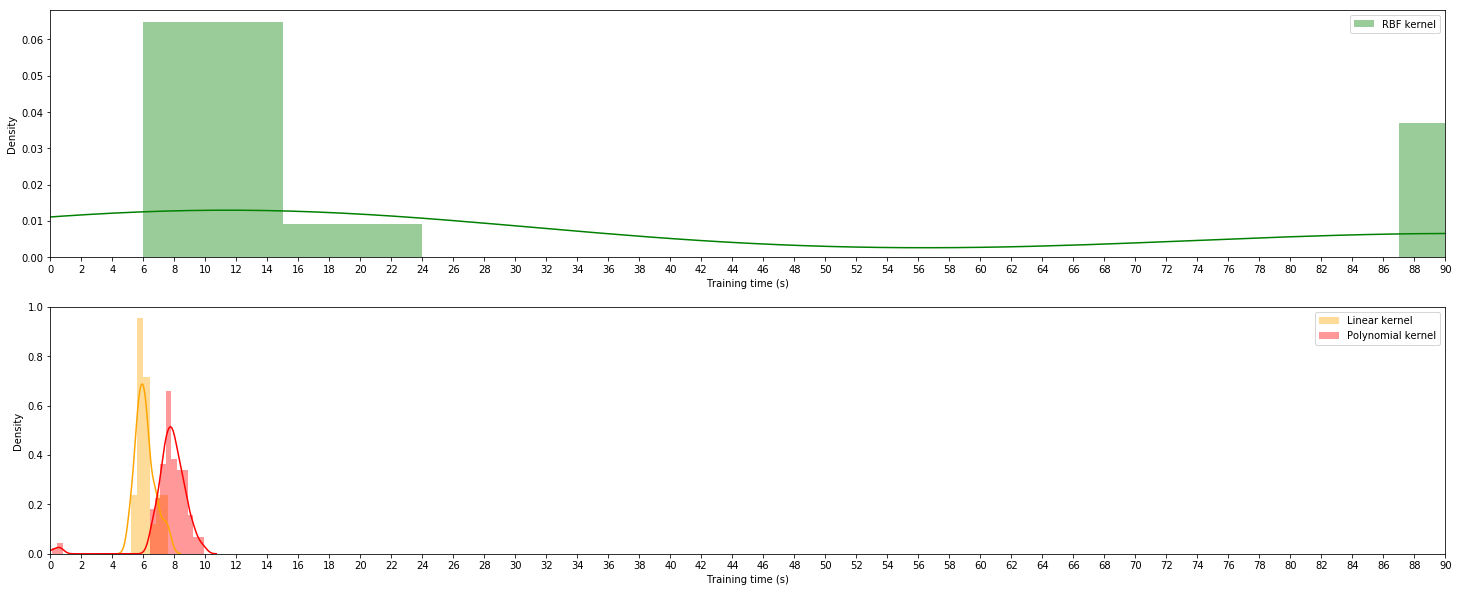

In [342]:
fig, axes = plt.subplots(2,figsize=(25,10))
sns.distplot(jobs_rbf,bins=10,ax=axes[0], label='RBF kernel',color='green')
sns.distplot(jobs_lin,ax=axes[1],label='Linear kernel',color='orange')
sns.distplot(jobs_poly,ax=axes[1],label='Polynomial kernel',color='red')
axes[0].legend(loc=1)
axes[0].set_xlim(0,90)
axes[0].set_xticks(range(0,91,2))



axes[1].legend()
axes[1].set_xlim(0,90)
axes[1].set_xlabel('Training time (s)')
axes[1].set_xticks(range(0,91,2))
axes[0].set_xlabel('Training time (s)')
axes[0].set_ylabel('Density')
axes[1].set_ylabel('Density')
plt.show()

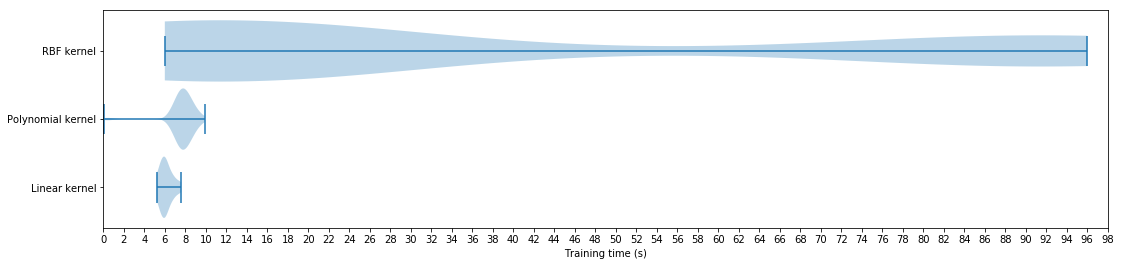

In [347]:
fig,ax= plt.subplots(1,figsize=(18,4))
ax.violinplot([jobs_lin,jobs_poly,jobs_rbf],vert=False, widths=0.9)
ax.set_yticks(range(1,4))
ax.set_yticklabels(['Linear kernel','Polynomial kernel','RBF kernel'])
ax.set_xlim(0,98)
ax.set_xticks(np.arange(0,100,2))
ax.set_xlabel('Training time (s)')
plt.show()

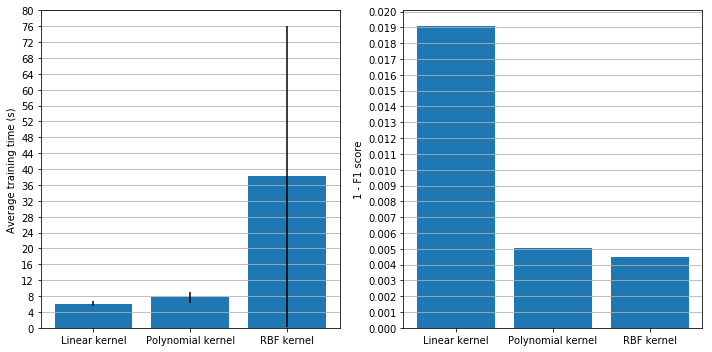

In [340]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].bar(['Linear kernel','Polynomial kernel','RBF kernel'],[np.mean(jobs_lin),np.mean(jobs_poly),np.mean(jobs_rbf)],yerr=[np.std(jobs_lin),np.std(jobs_poly),np.std(jobs_rbf)])
axes[0].set_ylabel('Average training time (s)')
axes[0].set_yticks(np.linspace(0,80,21))
axes[0].grid(axis='y')



axes[1].bar(['Linear kernel','Polynomial kernel','RBF kernel'],[1-f1_lin_test, 1-f1_poly_test, 1-f1_rbf_test])
# axes[1].set_ylim(0.98,1)
axes[1].set_ylabel('1 - F1 score')
axes[1].set_yticks(np.arange(0,0.021,0.001))
axes[1].grid(axis='y')



plt.tight_layout()

plt.show()